In [ ]:
#자동차 연비 분석, 회귀분석 모델 + 산점도 이용해보기
#자동차 연비 모델 가져오기(auto MPG)
#공식사이트 : https://archive.ics.uci.edu/dataset/9/auto+mpg

In [3]:
#auto-mpg.csv를 읽어서 확인해보기
import numpy as np
import pandas as pd

data_df = pd.read_csv("./auto-mpg.csv",header=0, engine="python")
print(f"data_df의 크기 : {data_df.shape}")
data_df.head()



data_df의 크기 : (398, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,orgin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
#특정 컬럼 제외하기 horsepower, orgin, car_name
data_df = data_df.drop(["horsepower","orgin","car_name"],axis=1, inplace=False)
data_df.head()


,mpg,cylinders,displacement,weight,acceleration,model_year
0,18.0,8,307.0,3504,12.0,70
1,15.0,8,350.0,3693,11.5,70
2,18.0,8,318.0,3436,11.0,70
3,16.0,8,304.0,3433,12.0,70
4,17.0,8,302.0,3449,10.5,70


In [6]:
#기본 컬럼 조사, info()
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 18.8 KB


In [7]:
#선형 회귀 분석 모델을 활용해서 -> 자동차 연비가,  어느 피쳐(독립변수,x) 의 영향을 받는지 조사
from sklearn.linear_model import LinearRegression
#학습용, 평가용 분리
from sklearn.model_selection import train_test_split
# 분석 평가지수, MSE(오류의 제곱 평균 : 낮을수록 좋다. 모델의 예측값이, 실제 값과 거의 유사)
# R^2 : 예측값/실제값 비율. 클수록 좋다.모델의 예측값이, 실제 값과 거의 유사
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
# X,Y 분할, 독립변수, 종속변수를 나누는 작업.
Y = data_df["mpg"]
# PRICE를 제외한 나머지 변수 가지고 오기.
# axis=1 -> 열 기준
# inplace=False -> 원본에 영향x
X = data_df.drop(["mpg"], axis=1, inplace=False)

In [9]:
#훈련용, 테스트용으로 데이터를 분리하는 작업
#(X,Y,test_size=0.3) -> 독립변수, 종속변수, 평가데이터 비율(30:평가, 70:학습)
#random_state=0 -> 동일한 방식으로 데이터 분할. -> 동일성 보장
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [10]:
#선형 회귀 분석 이용해서, 모델 생성
lr = LinearRegression()

In [11]:
#모델을 이용해서 훈련(학습)하기 ->fit
lr.fit(X_train,Y_train)

LinearRegression()

In [12]:
#학습된 모델을 이용해서 평가하기 -> predict, 예측값을 이용해서, 실제값과 비교하기
# 30문제로 평가하기. 예측값 구하기
y_predict = lr.predict(X_test)

In [13]:
# 평가 분석 지표
# MSE : 오류의 제곱 평균
# R^2 Score : 예측값/실제값 나눈 비율
# Y_test:답지, y_predict:시험 결과
mse = mean_squared_error(Y_test, y_predict)
# 4 -> 루트 4 -> 2 값을 통일 시켰다. 나중에 스케일링을 많이 함. 정규화 등으로 고쳐야 통계시
#효율적으로 작업이 진행되므로 이런 작업 많이 함
import numpy as np
rmse = np.sqrt(mse)
r2_value = r2_score(Y_test,y_predict)

print(f"mse : {mse}, rmse : {rmse}, r2_value : {r2_value}")

mse : 12.278239036609486, rmse : 3.5040318258556793, r2_value : 0.8078579451877166


In [14]:
# 선형 회귀 분석, 직선의 구성 요소 ,
#  y절편, 계수등에 대해서, 직선을 분석 해보기.
print(f"Y 절편의 값 : {lr.intercept_}")
#독립변수의 계수값
print(f"회귀 계수의 값 : {np.round(lr.coef_,1)}")


Y 절편의 값 : -17.548057223951815
회귀 계수의 값 : [-0.1  0.  -0.   0.2  0.8]


In [15]:
# mpg	cylinders	displacement	weight	acceleration	model_year 값 정리 
coef = pd.Series(data=np.round(lr.coef_,2), index= X.columns)
coef.sort_values(ascending = False)

model_year      0.76
acceleration    0.20
displacement    0.01
weight         -0.01
cylinders      -0.14
dtype: float64

In [ ]:
# 직선 -> y = ax+b
# Y(price) = -0.11 x X(crim) + 0.03 x X(INDUS) + ....
# 계수들은 모델의 성능을 최적화할 때 사용되는 하이퍼 매개변수, 웨이트 값(비중값)

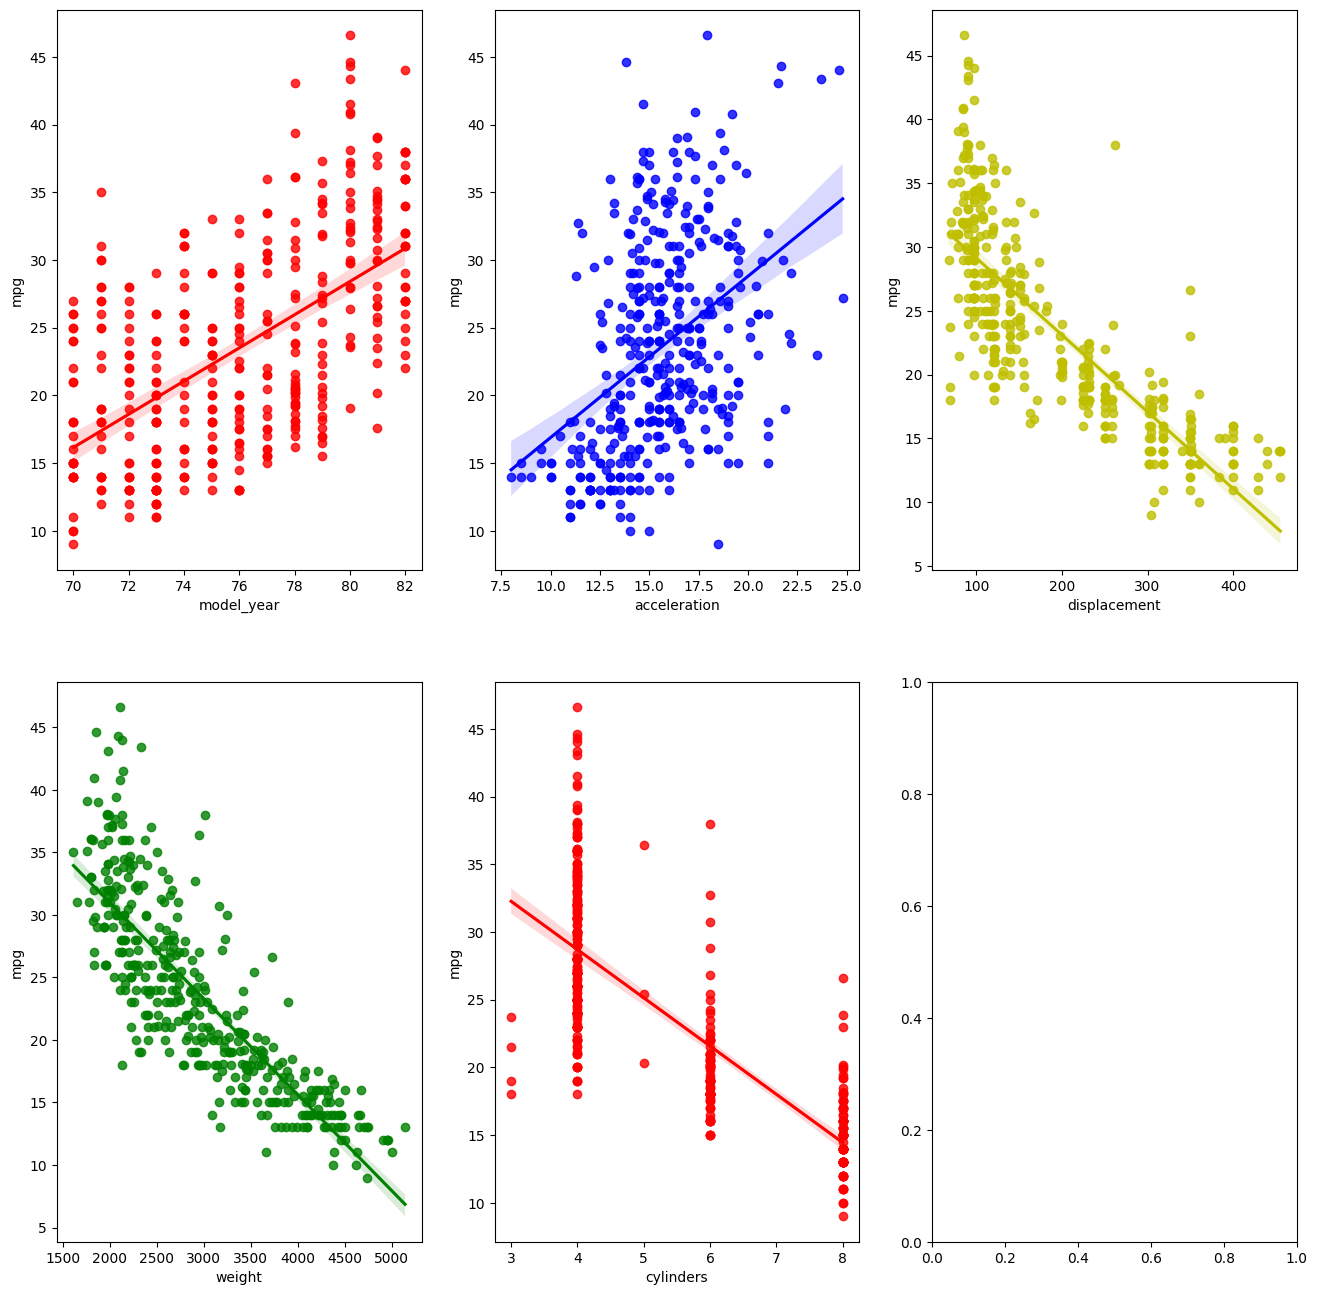

In [17]:
#학습된 모델을 통해서, 예측값도 구하고, 실제값과 비교도 하고 MSE R^2, 평가 지표
#학습된 모델의 예측값, 실제값과 얼마나 일치하는지를 조사.
#시각화

import matplotlib.pyplot as plt
import seaborn as sns

#이미지들을, 5x3 표 형태로 나타내기
fig, axs = plt.subplots(figsize = (16,16),ncols = 3, nrows = 2)

x_features = ["model_year","acceleration","displacement","weight",	"cylinders"]

#그래프의 색상 옵션
plot_color = ["r","b","y","g","r"]

for i,feature in enumerate(x_features):
  #몫 -> 2개 행으로
  row = int(i/3)
  #나머지 -> 0,1,2반복
  col = i % 3
  sns.regplot(x=feature, y="mpg",data=data_df, ax = axs[row][col], color = plot_color[i])


In [ ]:
#타이타닉 생존자수 데이터 가져와서 -> 선형회귀 모델을 구축-학습-평가